In [3]:
# Question 1
# Implementation  of the Simple Linear Regression(SLR) from scratch.

# I'm going to use Salary_Data Dataset  
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# PART A
df = pd.read_csv("Salary_Data.csv")
df

Mounted at /content/drive


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# PART B
# variable used
# Independent variable = YearsExperience = X
# Dependent variable = Salary = Y

X = df['YearsExperience'].values
print("YearsExperience : ",X)

Y = df['Salary'].values
print("Salary : ",Y)

YearsExperience :  [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
Salary :  [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [5]:
# PART C
# printing first few rows

df.head() #head will print frist 5 rows from Dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
# PART D
# Separate the dataset into train and test data as 80% and 20% respectively
# Using Scikit-learn ML library we will split data in 80/20 train/test ratio

from sklearn.model_selection import train_test_split

# by in-built function 'train_test_split' we split data into 80/20 ration
# for this we have to set test_size = 0.20
# here random_state Controls the shuffling applied to the data before applying the split.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 29)
print("Independent Training Data : ", X_train)
print("\nIndependent Testing Data : ", X_test)
print("\nDependent Training Data : ", Y_train)
print("\nDependent Testing Data : ", Y_test)

Independent Training Data :  [ 3.9  9.   4.1  3.   9.5  4.9  8.7  3.2  4.5  2.2  2.9  4.   7.9  1.3
 10.3 10.5  5.3  3.7  1.1  3.2  1.5  4.   6.   7.1]

Independent Testing Data :  [5.1 6.8 5.9 8.2 9.6 2. ]

Dependent Training Data :  [ 63218. 105582.  57081.  60150. 116969.  67938. 109431.  54445.  61111.
  39891.  56642.  55794. 101302.  46205. 122391. 121872.  83088.  57189.
  39343.  64445.  37731.  56957.  93940.  98273.]

Dependent Testing Data :  [ 66029.  91738.  81363. 113812. 112635.  43525.]


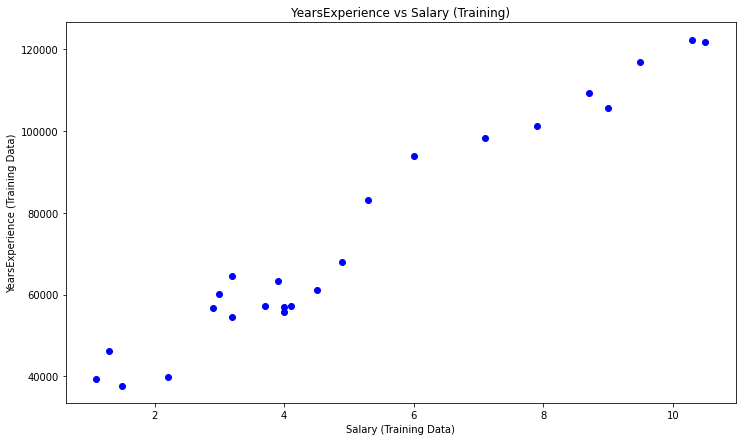

In [7]:
# PART E
# Plot the dataset (train dataset)( independent variable vs dependent variable)

# To plot dataset we will use matplotib library
import matplotlib.pyplot as plt

# figsize is a tuple of the width and height of the figure in inches
plt.figure(figsize = (12,7))

# Scatter Plot of Training Dataset
plt.scatter(X_train, Y_train, color='blue')
plt.title('YearsExperience vs Salary (Training)')
plt.xlabel('Salary (Training Data)')
plt.ylabel('YearsExperience (Training Data)')
plt.show()

Slope of Regression Line :  9337.872905864882

Intercept of Regression Line :  26401.4616694024 



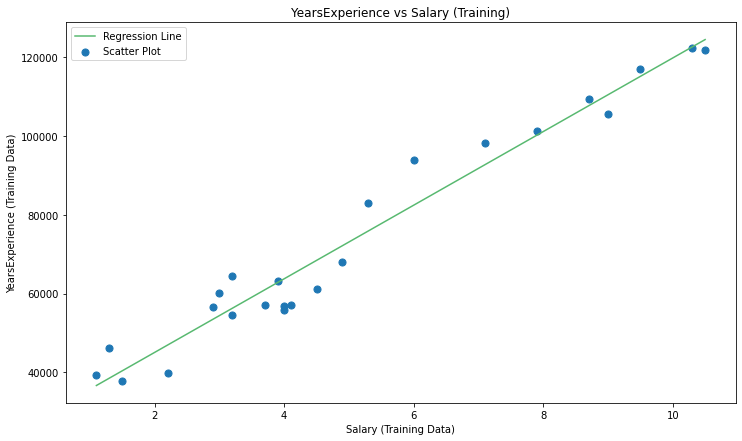

In [18]:
# PART F
# Calculate the regression line(train dataset)
# let say Relation between Y and X is Y_train = (theta1) * X_train + (theta0) = b1 * X_train + b0

mean_x = np.mean(X_train)
mean_y = np.mean(Y_train)

# i.) Compute the slope
# Slope : b1 = Sigma(x - mean_x) * Sigma(y - mean_y) / Sigma(x - mean_x) ** 2

# Length of Training Data
l = len(X_train)

n = 0
d = 0

for i in range(l):
  n += (X_train[i] - mean_x) * (Y_train[i] - mean_y)
  d += (X_train[i] - mean_x) ** 2

b1 = n / d
print("Slope of Regression Line : ", b1)

# ii.) Compute the intercept
# Intercept : b0 = mean_y - (b1 * mean_x)
b0 = mean_y - (b1 * mean_x)
print("\nIntercept of Regression Line : ", b0,'\n')

# iii.) Compute and Plot regression line with data points

max_x = np.max(X_train)
min_x = np.min(X_train)

x = np.linspace(min_x,max_x,1000)

# as Y_train = b1 * X_train + b0
y = b0 + b1 * x

plt.figure(figsize = (12,7))
plt.plot(x, y, color = '#58b970', label = "Regression Line")
plt.scatter(X_train, Y_train, s = 50, label = "Scatter Plot")
plt.title('YearsExperience vs Salary (Training)')
plt.xlabel('Salary (Training Data)')
plt.ylabel('YearsExperience (Training Data)')
plt.legend()
plt.show()

Predicted Values :  [ 74024.613  89898.997  81494.912 102972.019 116045.042  45077.207]


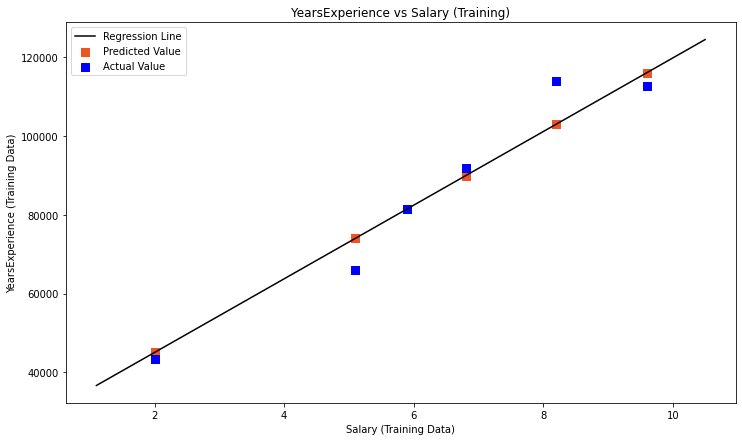

In [16]:
# PART G
# Predict the values using test data

def predicted_value(x_test):
  pred = []
  for i in x_test:
    y_pred = b1 * i + b0
    pred.append(y_pred) 
  return pred

Y_pred = predicted_value(X_test)
print("Predicted Values : ", np.around(Y_pred,3))

plt.figure(figsize = (12,7))
plt.plot(x, y, color = 'black', label = "Regression Line")
plt.scatter(X_test, Y_pred, s = 50, color = '#ef5423',marker = 's', label = "Predicted Value")
plt.scatter(X_test, Y_test, s = 50, color = 'blue',marker = 's', label = "Actual Value")
plt.title('YearsExperience vs Salary (Training)')
plt.xlabel('Salary (Training Data)')
plt.ylabel('YearsExperience (Training Data)')
plt.legend()
plt.show()

In [20]:
# PART H
# Calculate the error / accuracy of the model
# For This we will use root mean squared error(RMSE) method

from math import sqrt

def RSME(actual, predict):
  error = 0.0
  for i in range(len(actual)):
    pred_error = actual[i] - predict[i]
    error += (pred_error ** 2)
  mean_error = error/float(len(actual))
  return sqrt(mean_error)

rsme = RSME(Y_test, Y_pred)

print("Root Mean Squared Error : ",rsme)


Root Mean Squared Error :  5757.199479655677


In [9]:
# Question 2
# Implement the Multiple Linear Regression from scratch

import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# PART A
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delimiter = r"\s+", names = col)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [28]:
# PART B
# Scaling of the dataset [Standardization of the data]
# here Scaling of Independent Data will be done
# for scaling we need to import StandardScaler()

from sklearn.preprocessing import StandardScaler

# TAX and RAD are highly correlated features. 
# The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a 
# correlation score above 0.5 with MEDV which is a good indication of using as predictors

# So Choosing MEDV as Dependent Variable and all other as Independent Variable

# Separate the other attributes from the predicting attribute
X = df.drop('MEDV', axis=1)
# Separte the predicting attribute into Y
Y = df['MEDV']

print(X)
print(Y)

# Scaling
scaler = StandardScaler()

X_scale = scaler.fit_transform(X)

# Printing Standardize Independent Data
print("\nStandardize Data :- ")
X_scale = pd.DataFrame(X_scale, columns = col[:-1])

print(X_scale)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

In [103]:
# PART C
# Separate the dataset into train and test data as 80% and 20% respectively

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# splitting the data by taking test size as 20%
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y, test_size = 0.2, random_state = 42)
print("Independent Training Data :- \n", x_train)
print("Independent Testing Data :- \n", x_test)
print("Dependent Training Data :- \n", y_train)
print("Dependent Testing Data :- \n", y_test)

Independent Training Data :- 
          CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
477  1.327804 -0.487722  1.015999  ...  0.806576 -0.078878  1.718101
15  -0.347506 -0.487722 -0.437258  ...  1.176466  0.427018 -0.586356
332 -0.416484  1.014463 -0.740749  ... -0.719220  0.061137 -0.676067
423  0.399963 -0.487722  1.015999  ...  0.806576 -3.883072  1.491020
19  -0.336054 -0.487722 -0.437258  ...  1.176466  0.375814 -0.192467
..        ...       ...       ...  ...       ...       ...       ...
106 -0.400594 -0.487722 -0.375976  ...  1.130230  0.427566  0.842015
270 -0.385703  0.370669 -0.609431  ...  0.066796  0.350596  0.048631
348 -0.418771  2.945843 -1.331682  ... -0.672984  0.375704 -0.933987
435  0.878254 -0.487722  1.015999  ...  0.806576 -2.706267  1.488216
102 -0.393896 -0.487722 -0.375976  ...  1.130230 -3.134425 -0.283580

[404 rows x 13 columns]
Independent Testing Data :- 
          CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
173 -0.409837 -0.

In [101]:
# PART D
# Implement the logic of the algorithm using Gradient Descent Function

# Estimate linear regression coefficients using stochastic gradient descent

def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat

def coefficients_sgd(X_train, Y_train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(X_train[0])+1)]
	for epoch in range(n_epoch):
		sum_error = 0
		for i in range(len(X_train)):
			yhat = predict(X_train[i], coef)
			error = yhat - Y_train[i]
			sum_error += error**2
			coef[0] = coef[0] - l_rate * error
			for j in range(len(X_train[i])-1):
				coef[j + 1] = coef[j + 1] - l_rate * error * X_train[i][j]
	return coef

l_rate = 0.001
n_epoch = 50
coef = coefficients_sgd(np.array(x_train),np.array(y_train), l_rate, n_epoch)
print(np.around(coef,3))

[22.493 -1.204  0.387 -0.076  0.994 -2.419  4.71  -1.297 -3.113  1.492
 -1.052 -2.102  1.433  0.   ]


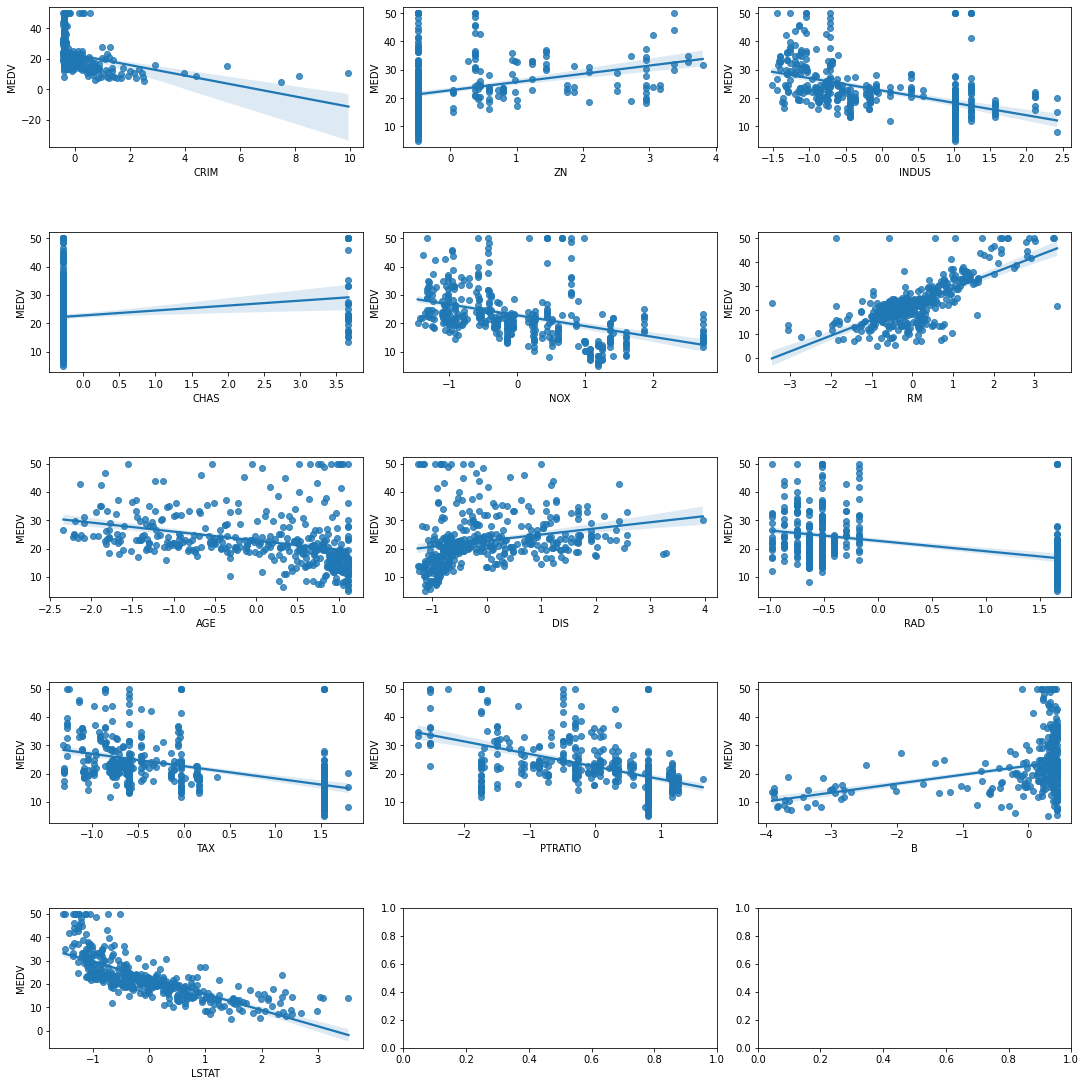

In [110]:
# PART E
# Train the model and plot the data
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols = 3, nrows = 5, figsize=(15, 15))
index = 0
axs = axs.flatten()
for i, k in enumerate(col[:-1]):
    sns.regplot(y = y_train, x = x_train[k], ax = axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [43]:
# PART F
# Predict the values using test data

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

y_pred =  LR.predict(x_test)
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [109]:
# PART G
# error / accuracy of the model using root mean squared error

# importing r2_score module (For Accuracy)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre : ', score)

# Root Mean Squared Error
print('root_mean_squared error : ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre :  0.668759493535632
root_mean_squared error :  4.928602182665336


In [112]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('197231_DSc_3-1.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/197231_DSc_3-1.ipynb to pdf
[NbConvertApp] Support files will be in 197231_DSc_3-1_files/
[NbConvertApp] Making directory ./197231_DSc_3-1_files
[NbConvertApp] Making directory ./197231_DSc_3-1_files
[NbConvertApp] Making directory ./197231_DSc_3-1_files
[NbConvertApp] Making directory ./197231_DSc_3-1_files
[NbConvertApp] Writing 59043 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 271338 bytes to /content/drive/My Drive/197231_DSc_3-1.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'